 DAEDALUS – Distributed and Automated Evolutionary Deep Architecture Learning with Unprecedented Scalability

This research code was developed as part of the research programme Open Technology Programme with project number 18373, which was financed by the Dutch Research Council (NWO), Elekta, and Ortec Logiqcare.

Project leaders: Peter A.N. Bosman, Tanja Alderliesten
Researchers: Alex Chebykin, Arthur Guijt, Vangelis Kostoulas
Main code developer: Arthur Guijt

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from scipy.stats import mannwhitneyu, shapiro

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, CustomJS, Button
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap, linear_cmap
from bokeh.palettes import Category20
from bokeh.layouts import column
from itertools import repeat, cycle

output_notebook()
%load_ext rpy2.ipython

Loading BokehJS ...

In [2]:
%%R
library(ggplot2)

R[write to console]: Keep up to date with changes at https://www.tidyverse.org/blog/



In [3]:
date_of_processing = "2022-11-24"

# Loading & Configuration

In [4]:
# experiment_path = Path("./results/aa5b6af/")
# results = pd.read_csv(experiment_path / "archive.csv.gz")
results = pd.concat([
    pd.read_csv("./results/2022-11-07-long-scalability-gomea-nasbench-1042df6-archive.csv.gz"),
    pd.read_csv("./results/2022-11-07-long-scalability-ecga-nasbench-1042df6-archive.csv.gz"),
    pd.read_csv("./results/2022-11-09-long-scalability-ecga-nasbench-8e78f7b-archive.csv.gz"),
    # pd.read_csv("./results/2022-11-07-long-scalability-ga-nasbench-1042df6-archive.csv.gz"), -- error: wrong mutation operator
    pd.read_csv("./results/2022-11-24-long-scalability-ga-nasbench-78dfc7a-archive.csv.gz"),
])

remapping_algorithm_type = {
    "sync": "ecga-sync",
    "async-throttled": "ecga-async-th",
}
results["algorithm_type"] = results["algorithm_type"].replace(remapping_algorithm_type)

problem_columns = ["problem"]
approach_columns = ["replacement_strategy", "algorithm_type", "tournament_size"]
run_columns = ["seed"]

In [5]:
results[~np.isnan(results["population_size"])]

,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),problem,seed,vtr,replacement_strategy,tournament_size,algorithm_type,population_size
0,0,64.0,2991.296144,-93.3221,1.0,NaN,6 2 5 5 0 0 7 0 1 4 2 2 1 4 2 0 2 2 2 1 0 1 0 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
1,1,64.0,3990.202799,-93.7250,2.0,1.0,6 2 1 5 0 3 4 2 1 2 2 0 1 4 0 4 1 3 2 5 3 6 5 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
2,2,64.0,4285.809296,-93.7264,3.0,2.0,5 2 1 1 2 1 6 0 2 3 2 1 4 6 1 4 2 4 2 2 4 0 3 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
3,3,64.0,4354.319780,-93.8720,4.0,3.0,0 2 1 4 2 0 4 2 3 0 5 2 3 0 6 5 4 2 6 0 4 4 2 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
4,4,64.0,4733.106435,-93.9089,5.0,4.0,0 3 2 2 0 2 2 2 5 5 1 1 6 3 0 2 4 2 0 1 3 3 4 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,39,100352.0,357788.794733,-95.2610,40.0,39.0,2 2 3 4 2 1 1 0 4 0 2 4 1 3 4 3 4 3 5 3 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0
3408,40,102400.0,364970.960557,-95.2672,41.0,40.0,2 2 3 4 2 1 1 0 4 0 4 3 2 4 3 3 3 3 2 4 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0
3409,41,116736.0,414782.090987,-95.2693,42.0,41.0,2 2 3 4 2 1 1 0 4 0 4 3 2 5 2 3 3 3 2 3 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0
3410,42,126976.0,451001.402075,-95.2723,43.0,42.0,2 2 0 4 2 1 1 0 4 0 3 3 3 4 3 3 4 3 3 3 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0


In [6]:
results[np.isnan(results["population_size"])]

,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),problem,seed,vtr,replacement_strategy,tournament_size,algorithm_type,population_size
134,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,43,95.2726,5,4,ecga-sync,NaN
249,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,46,95.2726,5,4,ecga-sync,NaN
418,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,50,95.2726,5,4,ecga-sync,NaN
468,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,44,95.2726,5,4,ecga-sync,NaN
469,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,49,95.2726,5,4,ecga-sync,NaN
509,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,47,95.2726,5,8,ecga-sync,NaN
510,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,50,95.2726,5,8,ecga-sync,NaN
511,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,45,95.2726,5,8,ecga-sync,NaN
512,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,46,95.2726,5,8,ecga-sync,NaN
513,0,NaN,NaN,NaN,NaN,NaN,NaN,nasbench301,45,95.2726,5,4,ecga-sync,NaN


In [7]:
# Since a lot of runs failed, we are going to minimize the amount of wasted time
# as such, we want an equation to determine the maximum interval between evaluations
# such that we do not get stuck on too small a population size.
successful_runs = results[~np.isnan(results["population_size"])]

In [8]:
dfe = (pl.from_pandas(successful_runs).lazy().\
    # order by evaluations, such that subsequent evaluations are subsequent in the df (just in case)
    sort("#evaluations").
    # group, such that we not calculate differences between different runs
    groupby(approach_columns + run_columns).agg([
        pl.all(),
        pl.col("#evaluations").shift(-1).alias("next"),
        (pl.col("#evaluations") - pl.col("#evaluations").shift_and_fill(1, 0.0)).alias("delta")
    ]).
    # grouping has resulted in everything turning into lists, convert back.
    explode(pl.all().exclude(approach_columns + run_columns)).
    # materialize lazy
    collect())

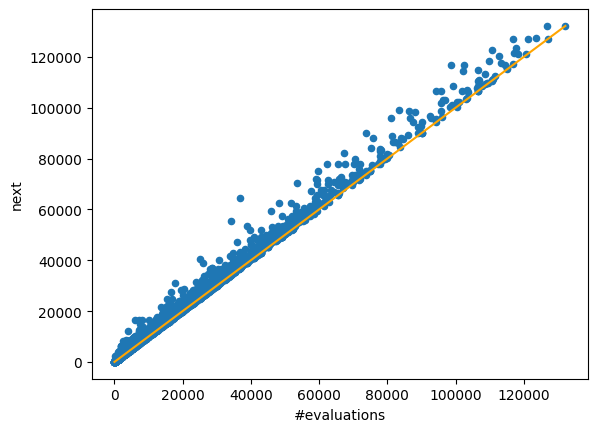

In [9]:
dfepd = dfe.to_pandas()
# plot datapoints
dfepd.plot(x="#evaluations", y="next", kind="scatter")
# plot x=y - holds for initial samples. 
p = (dfepd["#evaluations"].min(), dfepd["#evaluations"].max())
plt.plot(p, p, c='orange')
#
# plt.yscale('log')

In [10]:
from scipy.optimize import linprog

In [11]:
# minimize waiting time using an optimized linear program
# obtain f and c such that
# x_next <= f * x + c, where x = #evaluations and x_next = #evaluations for the next run.
# minimizing the surface area under the curve over the range of values:
# 1/2 f x^2 + c x | min ^ max
# = 1/2 f p[1] + c p[1] - (1/2 f p[0] + c p[0])
# = 1/2 f (p[1] - p[0]) + c (p[1] - p[0])
d = (p[1] - p[0])
c = [(d**2)/2, d]

# x_next <= f * x + c
# -f * x - c <= -x_next
n = dfepd["next"]
sub = np.isfinite(n)
e = dfepd["#evaluations"][sub]
n = n[sub]

A_ub = np.vstack([np.vstack([-e, -np.ones(e.size)]).T, [-1, 0]])
b_ub = np.concatenate([-n.to_numpy(), [-1]])

s = linprog(c, A_ub=A_ub, b_ub=b_ub)

In [12]:
s.x

array([1.0000e+00, 2.7648e+04])

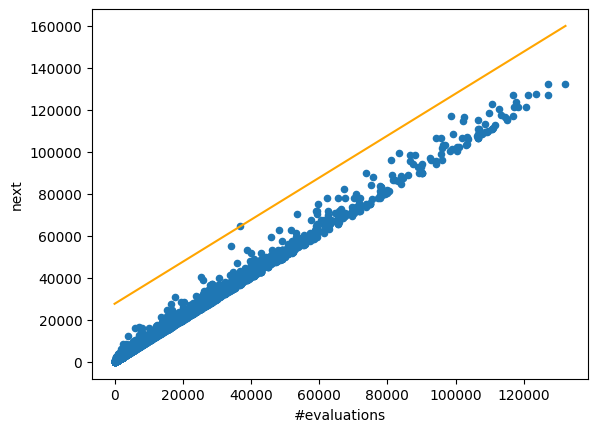

In [13]:
dfepd = dfe.to_pandas()
# plot datapoints
dfepd.plot(x="#evaluations", y="next", kind="scatter")
# plot x=y - holds for initial samples. 
p = (dfepd["#evaluations"].min(), dfepd["#evaluations"].max())
xs = [p[0], p[1]]
ys = [p[0] * s.x[0] + s.x[1], p[1] * s.x[0] + s.x[1]]
plt.plot(xs, ys, c='orange')
#
# plt.yscale('log')

In [14]:
# we could at this point also try to minimize per population size,
# providing the population size as parameter.

In [15]:
results

,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),problem,seed,vtr,replacement_strategy,tournament_size,algorithm_type,population_size
0,0,64.0,2991.296144,-93.3221,1.0,NaN,6 2 5 5 0 0 7 0 1 4 2 2 1 4 2 0 2 2 2 1 0 1 0 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
1,1,64.0,3990.202799,-93.7250,2.0,1.0,6 2 1 5 0 3 4 2 1 2 2 0 1 4 0 4 1 3 2 5 3 6 5 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
2,2,64.0,4285.809296,-93.7264,3.0,2.0,5 2 1 1 2 1 6 0 2 3 2 1 4 6 1 4 2 4 2 2 4 0 3 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
3,3,64.0,4354.319780,-93.8720,4.0,3.0,0 2 1 4 2 0 4 2 3 0 5 2 3 0 6 5 4 2 6 0 4 4 2 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
4,4,64.0,4733.106435,-93.9089,5.0,4.0,0 3 2 2 0 2 2 2 5 5 1 1 6 3 0 2 4 2 0 1 3 3 4 ...,nasbench301,50,95.2726,0,4,gomea-sync,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,39,100352.0,357788.794733,-95.2610,40.0,39.0,2 2 3 4 2 1 1 0 4 0 2 4 1 3 4 3 4 3 5 3 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0
3408,40,102400.0,364970.960557,-95.2672,41.0,40.0,2 2 3 4 2 1 1 0 4 0 4 3 2 4 3 3 3 3 2 4 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0
3409,41,116736.0,414782.090987,-95.2693,42.0,41.0,2 2 3 4 2 1 1 0 4 0 4 3 2 5 2 3 3 3 2 3 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0
3410,42,126976.0,451001.402075,-95.2723,43.0,42.0,2 2 0 4 2 1 1 0 4 0 3 3 3 4 3 3 4 3 3 3 2 3 4 ...,nasbench301,44,95.2726,5,4,ga-twopoint-sync,2048.0


In [16]:
# Compute the hitting evaluation
# def select_hit(df):
#     return df.iloc[df["archive ordinal"].argmax()]
results_hit = results.sort_values("archive ordinal").groupby(problem_columns + approach_columns + run_columns).last().reset_index().fillna(np.inf)

In [17]:
results_hit

,problem,replacement_strategy,algorithm_type,tournament_size,seed,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),vtr,population_size
0,nasbench301,0,gomea-async,4,42,45,6268.0,1.514762e+06,-95.2776,46.0,45.0,2 2 0 4 2 1 2 0 4 0 3 4 4 6 3 3 3 3 4 4 6 3 0 ...,95.2726,24.0
1,nasbench301,0,gomea-async,4,43,40,4592.0,1.657238e+06,-95.2732,41.0,40.0,2 2 4 4 2 1 2 0 4 0 6 3 4 1 3 3 3 3 4 3 6 3 4 ...,95.2726,16.0
2,nasbench301,0,gomea-async,4,44,47,72648.0,1.997701e+06,-95.2760,48.0,47.0,2 2 4 4 2 1 2 0 4 0 2 3 4 0 4 3 3 3 2 4 3 3 4 ...,95.2726,212.0
3,nasbench301,0,gomea-async,4,45,55,28254.0,2.952802e+06,-95.2727,56.0,55.0,2 2 0 4 2 1 1 0 4 0 3 3 6 6 4 3 4 3 4 3 0 3 4 ...,95.2726,56.0
4,nasbench301,0,gomea-async,4,46,57,34552.0,2.552366e+06,-95.2776,58.0,57.0,2 2 0 4 2 1 2 0 4 0 0 3 4 0 3 3 3 3 2 4 3 3 0 ...,95.2726,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,nasbench301,6,ga-uniform-sync,4,47,38,6000.0,1.733784e+05,-95.2801,39.0,38.0,2 2 3 4 2 1 2 0 4 0 3 6 4 3 2 3 3 3 3 3 5 3 3 ...,95.2726,240.0
176,nasbench301,6,ga-uniform-sync,4,48,34,2688.0,1.642781e+05,-95.2727,35.0,34.0,2 2 0 4 2 1 1 0 4 0 4 3 0 2 4 3 4 3 4 3 5 3 4 ...,95.2726,112.0
177,nasbench301,6,ga-uniform-sync,4,49,60,17712.0,1.892286e+05,-95.2727,61.0,60.0,2 2 0 4 2 1 1 0 4 0 4 3 2 6 3 3 4 3 6 3 1 3 4 ...,95.2726,656.0
178,nasbench301,6,ga-uniform-sync,4,50,38,9920.0,1.397188e+05,-95.2727,39.0,38.0,2 2 0 4 2 1 1 0 4 0 3 3 6 0 5 3 4 3 4 3 0 3 4 ...,95.2726,496.0


# Required population size

In [18]:
results_hit_f = results_hit# [(results_hit["replacement_strategy"] == 5) | (results_hit["replacement_strategy"] == 6)]
approach_columns_r = approach_columns#["algorithm_type", "replacement_strategy"]
population_size_required = results_hit_f.groupby(problem_columns + approach_columns_r)["population_size"].median()
table = population_size_required.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=0)
table

/tmp/ipykernel_559/2870062163.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = population_size_required.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=0)


In [19]:
table.to_excel(f"{date_of_processing}-nasbench-popsize.xlsx")

In [20]:
# mean
results_hit_f = results_hit# [(results_hit["replacement_strategy"] == 5) | (results_hit["replacement_strategy"] == 6)]
approach_columns_r = approach_columns#["algorithm_type", "replacement_strategy"]
population_size_required = results_hit_f.groupby(problem_columns + approach_columns_r)["population_size"].mean()
table = population_size_required.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=0)
table.to_excel(f"{date_of_processing}-nasbench-popsize-mean.xlsx")
table

/tmp/ipykernel_559/1916504644.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = population_size_required.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=0)


In [21]:
df_pop_per_cat = results_hit_f.groupby(problem_columns + approach_columns_r)["population_size"].apply(list).reset_index()
df_pop_per_cat["approach"] = df_pop_per_cat["algorithm_type"] + "_" + df_pop_per_cat["tournament_size"].map(str) + "_" + df_pop_per_cat["replacement_strategy"].map(str)
cx_pc = pd.merge(df_pop_per_cat, df_pop_per_cat, how="cross")
cx_pc["stat"] = cx_pc.apply(lambda x: mannwhitneyu(x["population_size_x"], x["population_size_y"]).pvalue, axis=1)
pvt = cx_pc.pivot(columns="approach_x", index="approach_y", values="stat")
pvt.to_excel("nasbench-pop-require-compare-stattest.xlsx")


In [22]:
pvt

approach_x,ecga-async-th_4_5,ecga-async-th_4_6,ecga-async-th_8_5,ecga-async-th_8_6,ecga-sync_4_5,ecga-sync_4_6,ecga-sync_8_5,ecga-sync_8_6,ga-twopoint-async_4_5,ga-twopoint-async_4_6,ga-twopoint-sync_4_5,ga-twopoint-sync_4_6,ga-uniform-async_4_5,ga-uniform-async_4_6,ga-uniform-sync_4_5,ga-uniform-sync_4_6,gomea-async_4_0,gomea-sync_4_0
approach_y,,,,,,,,,,,,,,,,,,
ecga-async-th_4_5,1.000000,0.423672,0.621467,0.306396,0.000063,0.000165,0.000274,0.000117,0.008979,0.704396,0.075112,0.094927,0.000982,0.129991,0.002807,0.017132,0.000181,0.000177
ecga-async-th_4_6,0.423672,1.000000,0.848866,0.569587,0.000225,0.000909,0.001911,0.000566,0.000179,0.790178,0.001293,0.382337,0.000175,0.017048,0.000241,0.000986,0.000179,0.000175
ecga-async-th_8_5,0.621467,0.848866,1.000000,0.733053,0.000062,0.000306,0.000494,0.000117,0.000180,0.969770,0.001686,0.305481,0.000176,0.017090,0.000325,0.001468,0.000180,0.000176
ecga-async-th_8_6,0.306396,0.569587,0.733053,1.000000,0.000751,0.002526,0.004140,0.001444,0.001487,0.595175,0.008103,0.595732,0.000429,0.009056,0.000765,0.002185,0.000182,0.000178
ecga-sync_4_5,0.000063,0.000225,0.000062,0.000751,1.000000,0.368120,0.168078,0.368120,0.000064,0.000751,0.000064,0.000228,0.000062,0.000063,0.000064,0.000063,0.000064,0.000062
ecga-sync_4_6,0.000165,0.000909,0.000306,0.002526,0.368120,1.000000,0.584249,1.000000,0.000087,0.001916,0.000102,0.000905,0.000085,0.000087,0.000087,0.000087,0.000087,0.000085
ecga-sync_8_5,0.000274,0.001911,0.000494,0.004140,0.168078,0.584249,1.000000,0.542802,0.000111,0.003627,0.000152,0.001970,0.000108,0.000110,0.000111,0.000110,0.000111,0.000108
ecga-sync_8_6,0.000117,0.000566,0.000117,0.001444,0.368120,1.000000,0.542802,1.000000,0.000087,0.001657,0.000087,0.000435,0.000085,0.000087,0.000087,0.000087,0.000087,0.000085
ga-twopoint-async_4_5,0.008979,0.000179,0.000180,0.001487,0.000064,0.000087,0.000111,0.000087,1.000000,0.031019,0.120945,0.000181,0.008953,0.112140,0.198596,0.363985,0.000330,0.000179


In [23]:
population_size_required = results_hit.groupby(problem_columns + approach_columns)["population_size"].quantile([0.05, 0.10, 0.20, 0.5, 0.8, 0.9, 0.95])
population_size_required = population_size_required.unstack().reset_index().rename(columns={
    0.05: "0.05",
    0.10: "0.10",
    0.20: "0.20",
    0.50: "0.50",
    0.80: "0.80",
    0.90: "0.90",
    0.95: "0.95",
})
population_size_required["approach"] = population_size_required["algorithm_type"] + "_" + population_size_required["replacement_strategy"].map(str) # + "_" + population_size_required["tournament_size"].map(str)
# population_size_required["problem"] = population_size_required["problem"]
population_size_required

,problem,replacement_strategy,algorithm_type,tournament_size,0.05,0.10,0.20,0.50,0.80,0.90,0.95,approach
0,nasbench301,0,gomea-async,4,19.6,23.2,30.4,48.0,96.8,168.8,190.4,gomea-async_0
1,nasbench301,0,gomea-sync,4,27.6,31.2,32.0,42.0,60.8,67.6,83.8,gomea-sync_0
2,nasbench301,5,ecga-async-th,4,256.0,256.0,707.2,1208.0,2150.4,4096.0,4096.0,ecga-async-th_5
3,nasbench301,5,ecga-async-th,8,768.0,768.0,912.0,1384.0,3276.8,4096.0,4096.0,ecga-async-th_5
4,nasbench301,5,ecga-sync,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ecga-sync_5
5,nasbench301,5,ecga-sync,8,2934.4,3884.8,inf,NaN,NaN,NaN,NaN,ecga-sync_5
6,nasbench301,5,ga-twopoint-async,4,178.4,228.8,252.8,352.0,563.2,646.4,675.2,ga-twopoint-async_5
7,nasbench301,5,ga-twopoint-sync,4,308.2,360.4,416.8,504.0,729.6,953.6,1500.8,ga-twopoint-sync_5
8,nasbench301,5,ga-uniform-async,4,108.6,121.2,124.0,170.0,269.6,308.0,380.0,ga-uniform-async_5
9,nasbench301,5,ga-uniform-sync,4,140.6,153.2,188.0,252.0,371.2,612.8,706.4,ga-uniform-sync_5


In [ ]:
pass # Error catcher

In [13]:
# # Statistical Test against differently timed variants
# use_continuity = True
# problem_columns_not_runtime = [a for a in problem_columns if a != "runtime_type"]
# samples_per_config = results_hit_f.groupby(problem_columns + approach_columns)["population_size"].agg(list).reset_index()
# runtime_pairings = pd.merge(samples_per_config, samples_per_config, on=problem_columns_not_runtime + approach_columns)
# # runtime_pairings["statistical_test"] = runtime_pairings.apply(lambda r: mannwhitneyu(r["population_size_x"], r["population_size_y"]), axis=1)
# runtime_pairings["statistical_test"] = runtime_pairings.apply(lambda r: mannwhitneyu(r["population_size_x"], r["population_size_y"], use_continuity=use_continuity).pvalue, axis=1)
# columns_to_keep = problem_columns_not_runtime + approach_columns + ["runtime_type_x", "runtime_type_y", "statistical_test"]
# paired_test_result = runtime_pairings[columns_to_keep].pivot(problem_columns_not_runtime + approach_columns + ["runtime_type_x"], ["runtime_type_y"]).style
# paired_test_result.to_excel(f"{date_of_processing}-nklandscape-stattest.xlsx")

In [25]:
success_rate = (results_hit["population_size"] != np.inf).groupby([results_hit[x] for x in (problem_columns + approach_columns_r)]).mean()
table = success_rate.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=3)
table.to_excel(f"{date_of_processing}-nasbench-success-rate.xlsx")
table

/tmp/ipykernel_494/2073333840.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = success_rate.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=3)


In [24]:
sample_count = results_hit["population_size"].groupby([results_hit[x] for x in (problem_columns + approach_columns_r)]).count()
table = sample_count.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=3)
table.to_excel(f"{date_of_processing}-nasbench-sample-count.xlsx")
table

/tmp/ipykernel_559/4212616954.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = sample_count.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=3)


# Evaluations required

In [25]:
evaluations_required = results_hit.groupby(problem_columns + approach_columns)["#evaluations"].median()
table = evaluations_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style
# table.to_excel(f"{date_of_processing}-nklandscape-evaluations-required-median.xlsx")
table

/tmp/ipykernel_559/1344687293.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = evaluations_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style


In [ ]:
evaluations_required = results_hit.groupby(problem_columns + approach_columns)["#evaluations"].quantile(0.95)
evaluations_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style

In [ ]:
evaluations_required = results_hit.groupby(problem_columns + approach_columns)["#evaluations"].quantile([0.05, 0.5, 0.95])
evaluations_required = evaluations_required.unstack().reset_index().rename(columns={
    0.05: "0.05",
    0.50: "0.50",
    0.95: "0.95",
})
evaluations_required["approach"] = evaluations_required["algorithm_type"] + "_" + evaluations_required["replacement_strategy"].map(str) + "_" + evaluations_required["tournament_size"].map(str)
evaluations_required["problem and t"] = evaluations_required["problem"] + "_" + evaluations_required["runtime_type"]

In [ ]:
s = evaluations_required[(evaluations_required["problem"] == "onemax") & (evaluations_required["runtime_type"] == "constant")]

c = Category20[20]

TOOLTIPS = [
    ("approach", "@approach"),
    ("l", "@l"),
    ("#evaluations", "@{0.50}")
]
f = figure(
    tools=["hover"],
    plot_width=800, plot_height=800
)
f.hover.tooltips = TOOLTIPS
# approach_colormapped = factor_cmap(field_name="approach", palette=Category20[20], factors=s["approach"].unique())
for (name, df), color in zip(s.groupby("approach"), cycle(c)):
    cds = ColumnDataSource(df)
    r = f.line(
        source=cds,
        x="l",
        y="0.50",
        color=color,
        line_width=2,
        legend_label = name)
    f.varea(
        source=cds,
        x="l",
        y1="0.95",
        y2="0.05",
        color=color,
        alpha=0.5,
        muted_alpha=0.0,
        legend_label = name
    )

# f.legend.click_policy = "mute"
f.legend.click_policy = "hide"
f.legend.orientation = "vertical"
f.legend.location = "top_left"

b = Button(label='Clear selection')
b.js_on_click(CustomJS(args=dict(cds=cds), code="cds.selected.indices = [];"))
show(f)

# (Simulated) Time required

In [26]:
sim_time_required = results_hit.groupby(problem_columns + approach_columns)["simulation time (s)"].median()
table = sim_time_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style
# table.to_excel(f"{date_of_processing}-nklandscape-sim-time-required-median.xlsx")
table

/tmp/ipykernel_647/4235523506.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = sim_time_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style


In [ ]:
sim_time_required = results_hit.groupby(problem_columns + approach_columns)["simulation time (s)"].quantile([0.05, 0.5, 0.95])
sim_time_required = sim_time_required.unstack().reset_index().rename(columns={
    0.05: "0.05",
    0.50: "0.50",
    0.95: "0.95",
})
sim_time_required["approach"] = sim_time_required["algorithm_type"] + "_" + sim_time_required["replacement_strategy"].map(str) + "_" + sim_time_required["tournament_size"].map(str)
sim_time_required["problem and t"] = sim_time_required["problem"] + "_" + sim_time_required["runtime_type"]

In [ ]:
s = sim_time_required[(sim_time_required["problem"] == "onemax") & (sim_time_required["runtime_type"] == "constant")]

c = Category20[20]

TOOLTIPS = [
    ("approach", "@approach"),
    ("l", "@l"),
    ("simulation time (s)", "@{0.50}")
]
f = figure(
    tools=["hover"],
    plot_width=800, plot_height=800
)
f.hover.tooltips = TOOLTIPS
# approach_colormapped = factor_cmap(field_name="approach", palette=Category20[20], factors=s["approach"].unique())
for (name, df), color in zip(s.groupby("approach"), cycle(c)):
    cds = ColumnDataSource(df)
    r = f.line(
        source=cds,
        x="l",
        y="0.50",
        color=color,
        line_width=2,
        legend_label = name)
    f.varea(
        source=cds,
        x="l",
        y1="0.95",
        y2="0.05",
        color=color,
        alpha=0.05,
        muted_alpha=0.0,
        legend_label = name
    )

# f.legend.click_policy = "mute"
f.legend.click_policy = "hide"
f.legend.orientation = "vertical"
f.legend.location = "top_left"

show(f)

# (Simulated) CPU Time required
As the previous metric can be minimized by evaluating the entire search space in parallel.
This metric multiplies by the number of parallel processors (in this case: the population size).
Note that if an approach does not scale perfectly, this score will be worse than single threaded.

In [ ]:
results_hit["simulated cpu time (s)"] = results_hit["simulation time (s)"] * results_hit["population_size"]
sim_cpu_time_required = results_hit.groupby(problem_columns + approach_columns)["simulated cpu time (s)"].mean()
sim_cpu_time_required